11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

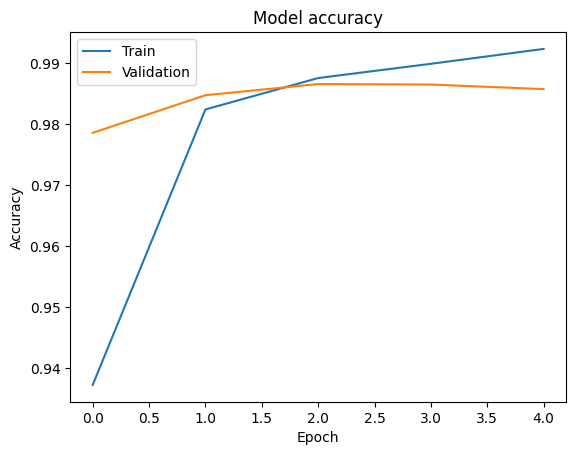

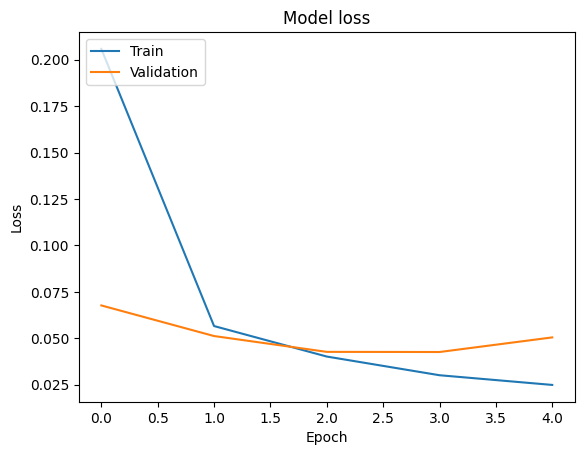

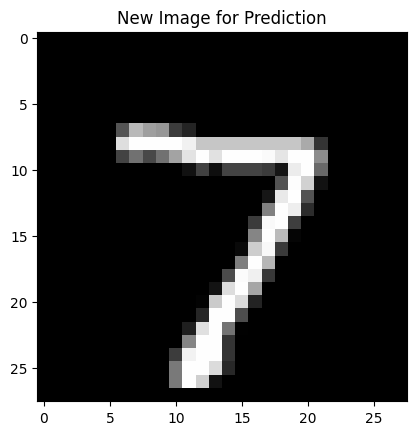

1/1 [==============================] - 0s 111ms/step
The model predicts this image as class: 7


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data: Reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output to feed it into the Dense Layer
model.add(layers.Flatten())

# Dense Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    batch_size=64,
                    validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Load a new image for prediction (from test set for simplicity)
# Let's use the first image in the test set as our "new" image
new_image = test_images[0]

# Display the image
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title('New Image for Prediction')
plt.show()

# Expand dimensions to fit the model's expected input shape
new_image = np.expand_dims(new_image, axis=0)  # (1, 28, 28, 1)

# Predict the class of the new image
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions)

# Output the prediction
print(f'The model predicts this image as class: {predicted_class}')


Here's a detailed explanation of each part of the code:

### Importing Necessary Libraries

```python
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
```

- **`numpy` (np)**: A fundamental package for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

- **`matplotlib.pyplot` (plt)**: A plotting library used for creating static, animated, and interactive visualizations in Python. Here, it is used to plot training metrics and display images.

- **`tensorflow` (tf)**: An open-source machine learning library used for a wide range of tasks, including neural networks. It provides tools for building and training models, particularly deep learning models.

- **`tensorflow.keras.layers`**: Contains layers used for building the architecture of neural networks, such as convolutional layers, pooling layers, and dense (fully connected) layers.

- **`tensorflow.keras.models`**: Provides utilities to define and train models.

- **`tensorflow.keras.datasets`**: Provides access to preloaded datasets like MNIST, which is used for this example.

- **`tensorflow.keras.utils.to_categorical`**: Converts labels to a one-hot encoded format, which is required for training neural networks with categorical cross-entropy loss.

### Load the MNIST Dataset

```python
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```

- **`mnist.load_data()`**: Loads the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits (0-9). It returns two tuples:
  - `(train_images, train_labels)`: Training data and corresponding labels.
  - `(test_images, test_labels)`: Testing data and corresponding labels.

### Preprocess the Data: Reshape and Normalize

```python
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
```

- **`reshape((60000, 28, 28, 1))`**: Reshapes the training images from a 3D array of shape `(60000, 28, 28)` to a 4D array of shape `(60000, 28, 28, 1)`. The extra dimension is added to represent the single channel (grayscale) of the images. Similarly for test images.

- **`astype('float32') / 255`**: Converts the pixel values from integers (0-255) to floating-point numbers (0.0-1.0). Dividing by 255 normalizes the data to a range between 0 and 1, which helps in stabilizing the training process.

### Convert Labels to One-Hot Encoding

```python
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```

- **`to_categorical()`**: Converts the integer labels (0-9) into a one-hot encoded format. For example, a label `2` would be converted to `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`. This format is used for categorical classification tasks in neural networks.

### Define the CNN Model

```python
model = models.Sequential()
```

- **`models.Sequential()`**: Creates a sequential model, which is a linear stack of layers. This model type is ideal for building simple feed-forward neural networks where the output of one layer is the input to the next.

### Add Layers to the Model

#### First Convolutional Layer

```python
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
```

- **`layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`**:
  - **`Conv2D`**: A 2D convolutional layer that applies 32 filters of size 3x3 to the input image.
  - **`activation='relu'`**: The ReLU (Rectified Linear Unit) activation function introduces non-linearity, helping the network learn complex patterns.
  - **`input_shape=(28, 28, 1)`**: Specifies the input shape for the first layer (28x28 pixels with 1 channel).

- **`layers.MaxPooling2D((2, 2))`**: A max-pooling layer that reduces the spatial dimensions by taking the maximum value over a 2x2 window. This operation helps in reducing the computational load and the number of parameters, while also providing some degree of translation invariance.

#### Second Convolutional Layer

```python
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
```

- **`layers.Conv2D(64, (3, 3), activation='relu')`**: Adds another convolutional layer with 64 filters of size 3x3. This increases the depth of the network, allowing it to learn more complex features.
- **`layers.MaxPooling2D((2, 2))`**: Adds another max-pooling layer to further reduce the spatial dimensions.

#### Third Convolutional Layer

```python
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
```

- **`layers.Conv2D(64, (3, 3), activation='relu')`**: Adds a third convolutional layer with 64 filters of size 3x3, further increasing the network's ability to capture detailed features.

### Flatten the Output to Feed It into the Dense Layer

```python
model.add(layers.Flatten())
```

- **`layers.Flatten()`**: Flattens the 3D output from the convolutional layers to a 1D vector. This is necessary before feeding the data into fully connected (dense) layers, which require 1D input.

### Dense Layers

```python
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
```

- **`layers.Dense(64, activation='relu')`**: Adds a dense layer with 64 neurons and ReLU activation. Dense layers are fully connected layers where each neuron receives input from all neurons in the previous layer.

- **`layers.Dense(10, activation='softmax')`**: Adds the output layer with 10 neurons (one for each digit class) and softmax activation. The softmax function outputs a probability distribution over the 10 classes, allowing for multi-class classification.

### Compile the Model

```python
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

- **`optimizer='adam'`**: Specifies the Adam optimizer, which is an efficient optimization algorithm that adjusts learning rates dynamically based on the gradients. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.

- **`loss='categorical_crossentropy'`**: Specifies the categorical cross-entropy loss function, which is suitable for multi-class classification tasks. It measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels).

- **`metrics=['accuracy']`**: Specifies accuracy as the metric to be monitored during training and evaluation. Accuracy measures the proportion of correct predictions.

### Display the Model's Architecture

```python
model.summary()
```

- **`model.summary()`**: Prints a summary of the model's architecture, including the layer types, output shapes, and the number of parameters at each layer.

### Train the Model

```python
history = model.fit(train_images, train_labels, epochs=5,
                    batch_size=64,
                    validation_split=0.2)
```

- **`model.fit()`**: Trains the model on the training data.
  - **`train_images`**: The input data.
  - **`train_labels`**: The corresponding labels.
  - **`epochs=5`**: Specifies the number of epochs (full passes through the training data).
  - **`batch_size=64`**: The number of samples per gradient update.
  - **`validation_split=0.2`**: Reserves 20% of the training data for validation to monitor the model's performance on unseen data during training.

### Evaluate the Model

```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')
```

- **`model.evaluate()`**: Evaluates the model on the test data.
  - **`test_images`**: The input test data.
  - **`test_labels`**: The corresponding labels.
  - **`test_acc`**: The accuracy of the model on the test set, printed to four decimal places.

### Plot Training and Validation Metrics

```python
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot

 training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
```

- **Accuracy Plot**:
  - **`history.history['accuracy']`**: The training accuracy for each epoch.
  - **`history.history['val_accuracy']`**: The validation accuracy for each epoch.
  - **`plt.plot()`**: Plots the training and validation accuracy.
  - **`plt.title()`, `plt.xlabel()`, `plt.ylabel()`, `plt.legend()`, `plt.show()`**: Configures and displays the plot.

- **Loss Plot**:
  - **`history.history['loss']`**: The training loss for each epoch.
  - **`history.history['val_loss']`**: The validation loss for each epoch.
  - Similar plotting functions as for accuracy.

### Load a New Image for Prediction

```python
# Load a new image for prediction (from test set for simplicity)
# Let's use the first image in the test set as our "new" image
new_image = test_images[0]

# Display the image
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title('New Image for Prediction')
plt.show()
```

- **`new_image = test_images[0]`**: Selects the first image from the test set as the new image for prediction.
- **`plt.imshow()`**: Displays the image.
- **`plt.title()`, `plt.show()`**: Adds a title to the plot and displays it.

### Predict the Class of the New Image

```python
# Expand dimensions to fit the model's expected input shape
new_image = np.expand_dims(new_image, axis=0)  # (1, 28, 28, 1)

# Predict the class of the new image
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions)

# Output the prediction
print(f'The model predicts this image as class: {predicted_class}')
```

- **`np.expand_dims(new_image, axis=0)`**: Adds an extra dimension to the image array to match the input shape expected by the model `(1, 28, 28, 1)`.
- **`model.predict(new_image)`**: Predicts the class probabilities for the new image.
- **`np.argmax(predictions)`**: Returns the index of the maximum value in the predictions array, which corresponds to the predicted class.
- **`print()`**: Outputs the predicted class.

This code is a complete example of building, training, and evaluating a Convolutional Neural Network (CNN) for digit classification using the MNIST dataset. It covers all the key steps, from loading and preprocessing the data to defining the model, training, evaluation, and making predictions on new data.

In the context of training a machine learning model with Keras, the notation `750/750` in the line:

```
750/750 [==============================] - 45s 61ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0504 - val_accuracy: 0.9858
```

represents the progress of the model through the training batches for that particular epoch. Let's break it down:

### Detailed Explanation of `750/750`

1. **Epoch 5/5**: Indicates that this is the 5th and final epoch of training. An epoch is one complete pass through the entire training dataset.

2. **750/750**:
   - **750**: The first `750` represents the current batch number being processed.
   - **/750**: The second `750` represents the total number of batches for that epoch.

   So, `750/750` means that the model has processed all `750` batches for that epoch, completing the epoch.

### How This Number is Calculated

- **Total Number of Training Samples**: In your code, you have `60000` training samples.
- **Batch Size**: You have set the batch size to `64`.

To calculate the total number of batches:

\[ \text{Total Batches} = \frac{\text{Total Training Samples}}{\text{Batch Size}} = \frac{60000}{64} \approx 937.5 \]

Since we can't have a fraction of a batch, the number of batches is usually rounded up to the next whole number, which is `938`. However, Keras will ensure that the total number of samples is covered, often resulting in the last batch having fewer samples if the total is not a perfect multiple of the batch size.

### What Happens During an Epoch

- **Batch**: A batch is a subset of the training data. In each iteration, a batch is passed through the model for training, and the model parameters are updated based on the error computed for that batch.
  
- **Iteration**: The term `750/750` indicates that this was the 750th batch (iteration) out of a total of 750 batches for that epoch, meaning the epoch has completed.

### Additional Details in the Log

- **`[==============================]`**: This visual progress bar shows the progress of the training process for that epoch, where the completion of the bar indicates that the epoch is finished.

- **`45s`**: The time taken for the epoch to complete, which is 45 seconds in this case.

- **`61ms/step`**: The average time per step (batch), which is 61 milliseconds.

- **`loss: 0.0249`**: The loss for the training data at the end of this epoch, indicating how well the model is performing on the training data.

- **`accuracy: 0.9923`**: The accuracy of the model on the training data at the end of this epoch, which is 99.23%.

- **`val_loss: 0.0504`**: The loss on the validation data at the end of this epoch, providing an indication of how well the model generalizes to unseen data.

- **`val_accuracy: 0.9858`**: The accuracy on the validation data at the end of this epoch, which is 98.58%.

In summary, `750/750` signifies that the training process has completed all batches for the epoch, and this line summarizes the performance metrics for the entire epoch.